In [169]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.api import add_constant

In [162]:
def graph_residuals(model):
    plt.figure(figsize=(10, 7), dpi=300)
    for ix, resid in enumerate(model.resid):
        plt.plot([ix, ix], [0, resid], color="orange")
        plt.scatter(ix, resid, color="orange")

    plt.hlines(0, -1, 15.2, alpha=.5, linestyles="dashed")
    plt.xlim(-0.5, 15.2)
    plt.title(r"Residuals between $Y$ and $\bar Y$")
    plt.show()

****
## Exercise 7.16
Table 7.6 gives quarterly data on these variables:

* $Y$: Quantity of roses sold, dozens
* $X_2$: Average wholesale price of roses (\$/dozen)
* $X_3$: Average wholesale price of carnations (\$/dozen)
* $X_4$: Average weekly family disposible income (\$/dozen)
* $X_5$: The trend variable taking values in $\mathbb{N}$ for the period 1971-II to 1975-II in the Detroid metropolitan area

$$
Y_t = \alpha_1 + \alpha_2 X_{2t} + \alpha_3 X_{3t} + \alpha_4 X_{4t} + \alpha_5 X_{5t} + \varepsilon_t
$$

$$
\ln Y_t = \beta_1 + \beta_2 \ln X_{2t} + \beta_3 \ln X_{3t} + \beta_4 \ln X_{4t} + \beta_5 \ln X_{5t} + \varepsilon_t
$$


- a. Estimate the parameters of the linear model and interpret the results.


- b. Estimate the parameters of the log–linear model and interpret the results.


- c. $\beta_2$ , $\beta_3$ , and $\beta_4$ give, respectively, the own-price, cross-price, and income elastici-ties of demand. What are their a priori signs? Do the results concur with the a priori expectations?


- d. How would you compute the own-price, cross-price, and income elasticities for the linear model?


- e. On the basis of your analysis, which model, if either, would you choose and why?

#### a) Fitting the linear model

In [144]:
roses = pd.read_csv("roses.csv")
roses.head()

,Y,X2,X3,X4,X5
0,11484,2.26,3.49,158.11,1
1,9348,2.54,2.85,173.36,2
2,8429,3.07,4.06,165.26,3
3,10079,2.91,3.64,172.92,4
4,9240,2.73,3.21,178.46,5


In [46]:
roses_lmod = smf.ols("Y ~ X2 + X3 + X4 + X5", data=roses).fit()
roses_lmod.summary2()

/Users/gerardo/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.775     
Dependent Variable: Y                AIC:                269.4803  
Date:               2017-04-02 08:48 BIC:                273.3432  
No. Observations:   16               Log-Likelihood:     -129.74   
Df Model:           4                F-statistic:        13.89     
Df Residuals:       11               Prob (F-statistic): 0.000281  
R-squared:          0.835            Scale:              9.4066e+05
-------------------------------------------------------------------
            Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
Intercept 10816.0433 5988.3484  1.8062 0.0983 -2364.2228 23996.3093
X2        -2227.7044  920.4657 -2.4202 0.0340 -4253.6357  -201.7730
X3         1251.1412 1157.0206  1.0813 0.3027 -1295.4441  3797.7265
X4            6.2830   30.6217  0.2052 0.8412   -61.1148    73.6808
X5         -197.3999  101.5612 -1.9437 0.0780  -420.9347    26.1348
-------------------------------------------------------------------
Omnibus:                1.968        Durbin-Watson:           2.334
Prob(Omnibus):          0.374        Jarque-Bera (JB):        1.094
Skew:                   0.639        Prob(JB):                0.579
Kurtosis:               2.904        Condition No.:           4482 
===================================================================
* The condition number is large (4e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

Considering $\alpha = 0.05$. We see that this model is better than having an *intercept-only model*, since the F-statistic is significant at this $\alpha$-level.

On the other hand, the model fails to assert the significance of the intercept and the variables $X_4$ and $X_5$.

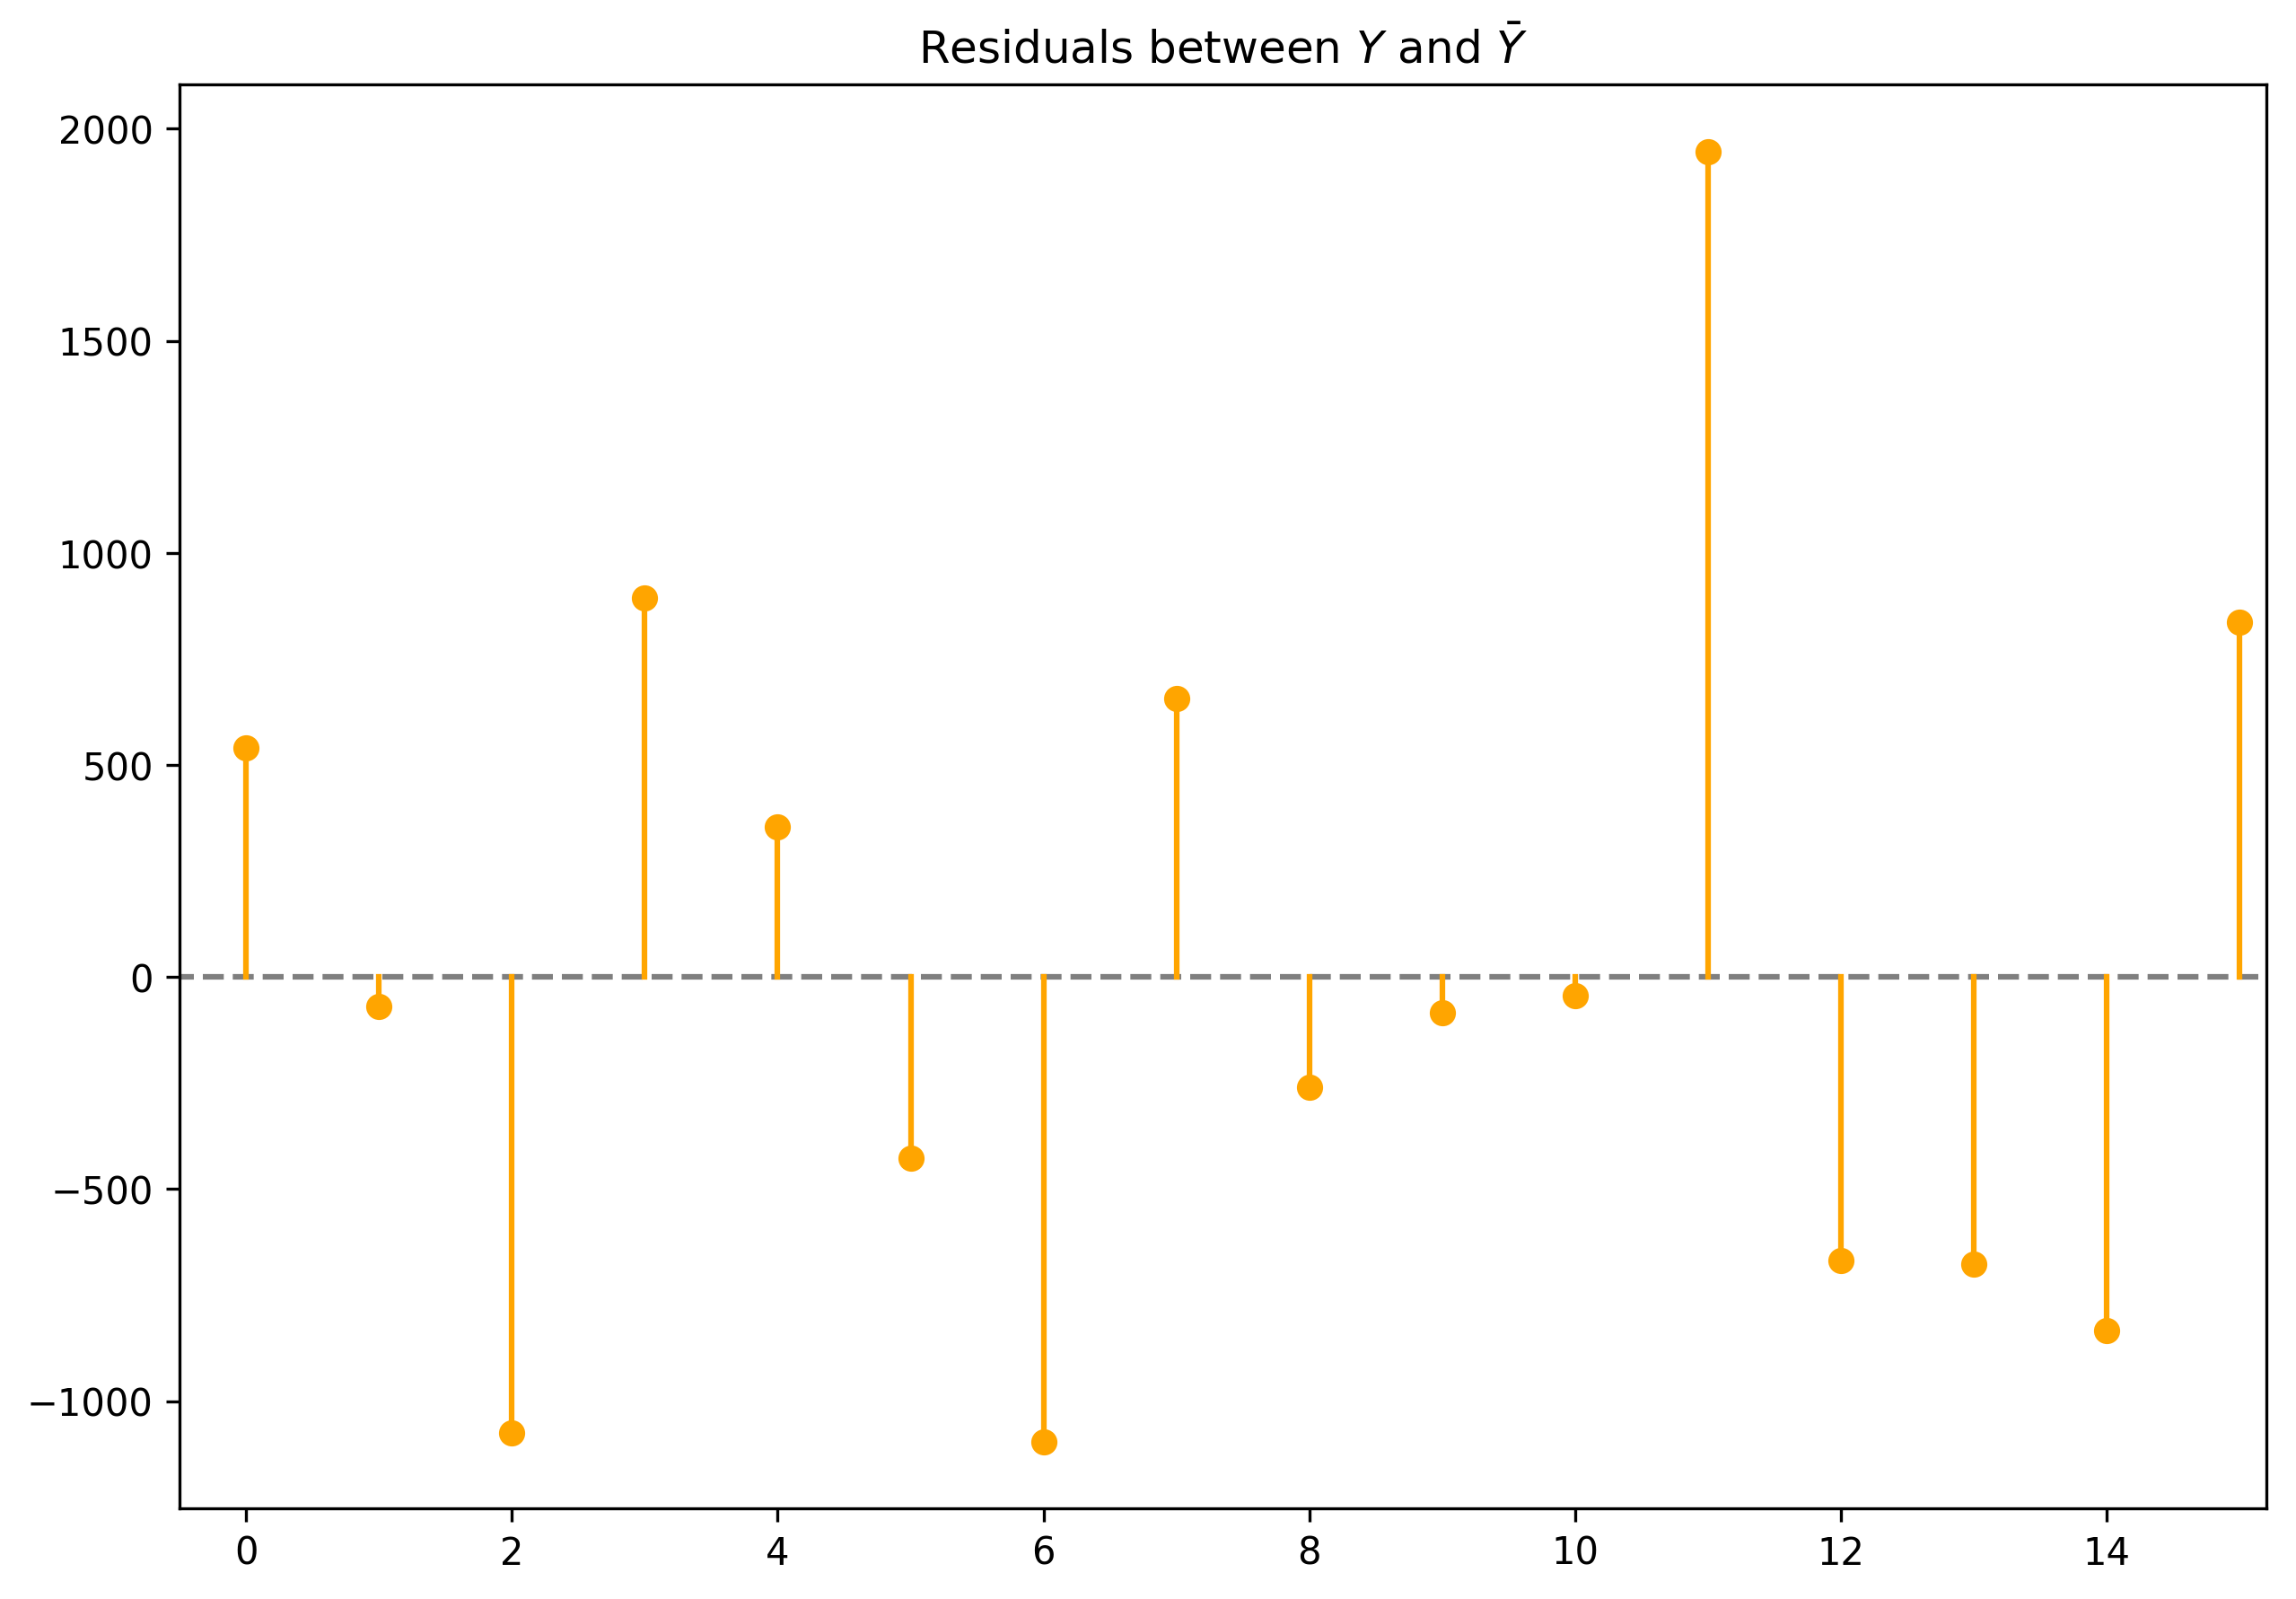

In [163]:
graph_residuals(roses_lmod)

#### b) Fitting the log-model

#### b) Fitting the log-model

In [50]:
roses_logmod = smf.ols("""np.log(Y) ~
                       np.log(X2) + np.log(X3) +
                       np.log(X4) + X5""",
                       data=roses).fit()
roses_logmod.summary2()

/Users/gerardo/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.726   
Dependent Variable: np.log(Y)        AIC:                -9.0821 
Date:               2017-04-02 09:14 BIC:                -5.2191 
No. Observations:   16               Log-Likelihood:     9.5410  
Df Model:           4                F-statistic:        10.92   
Df Residuals:       11               Prob (F-statistic): 0.000798
R-squared:          0.799            Scale:              0.025840
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept      3.5722    4.6952   0.7608  0.4628  -6.7618  13.9061
np.log(X2)    -1.1707    0.4883  -2.3974  0.0354  -2.2455  -0.0959
np.log(X3)     0.7379    0.6529   1.1303  0.2824  -0.6990   2.1749
np.log(X4)     1.1532    0.9020   1.2785  0.2274  -0.8321   3.1385
X5            -0.0301    0.0164  -1.8339  0.0938  -0.0662   0.0060
-----------------------------------------------------------------
Omnibus:              1.619        Durbin-Watson:           2.049
Prob(Omnibus):        0.445        Jarque-Bera (JB):        0.324
Skew:                 0.248        Prob(JB):                0.851
Kurtosis:             3.490        Condition No.:           1297 
=================================================================
* The condition number is large (1e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

The *log-lin* model appears to be significant, as it has a large F-statistic. On the other hand, looking at every coefficient in the model, we see that there appears to be 3 non-significant variables at $\alpha = 0.05$.

Also, this model appears to have a lower $R^2$ than the linear model.

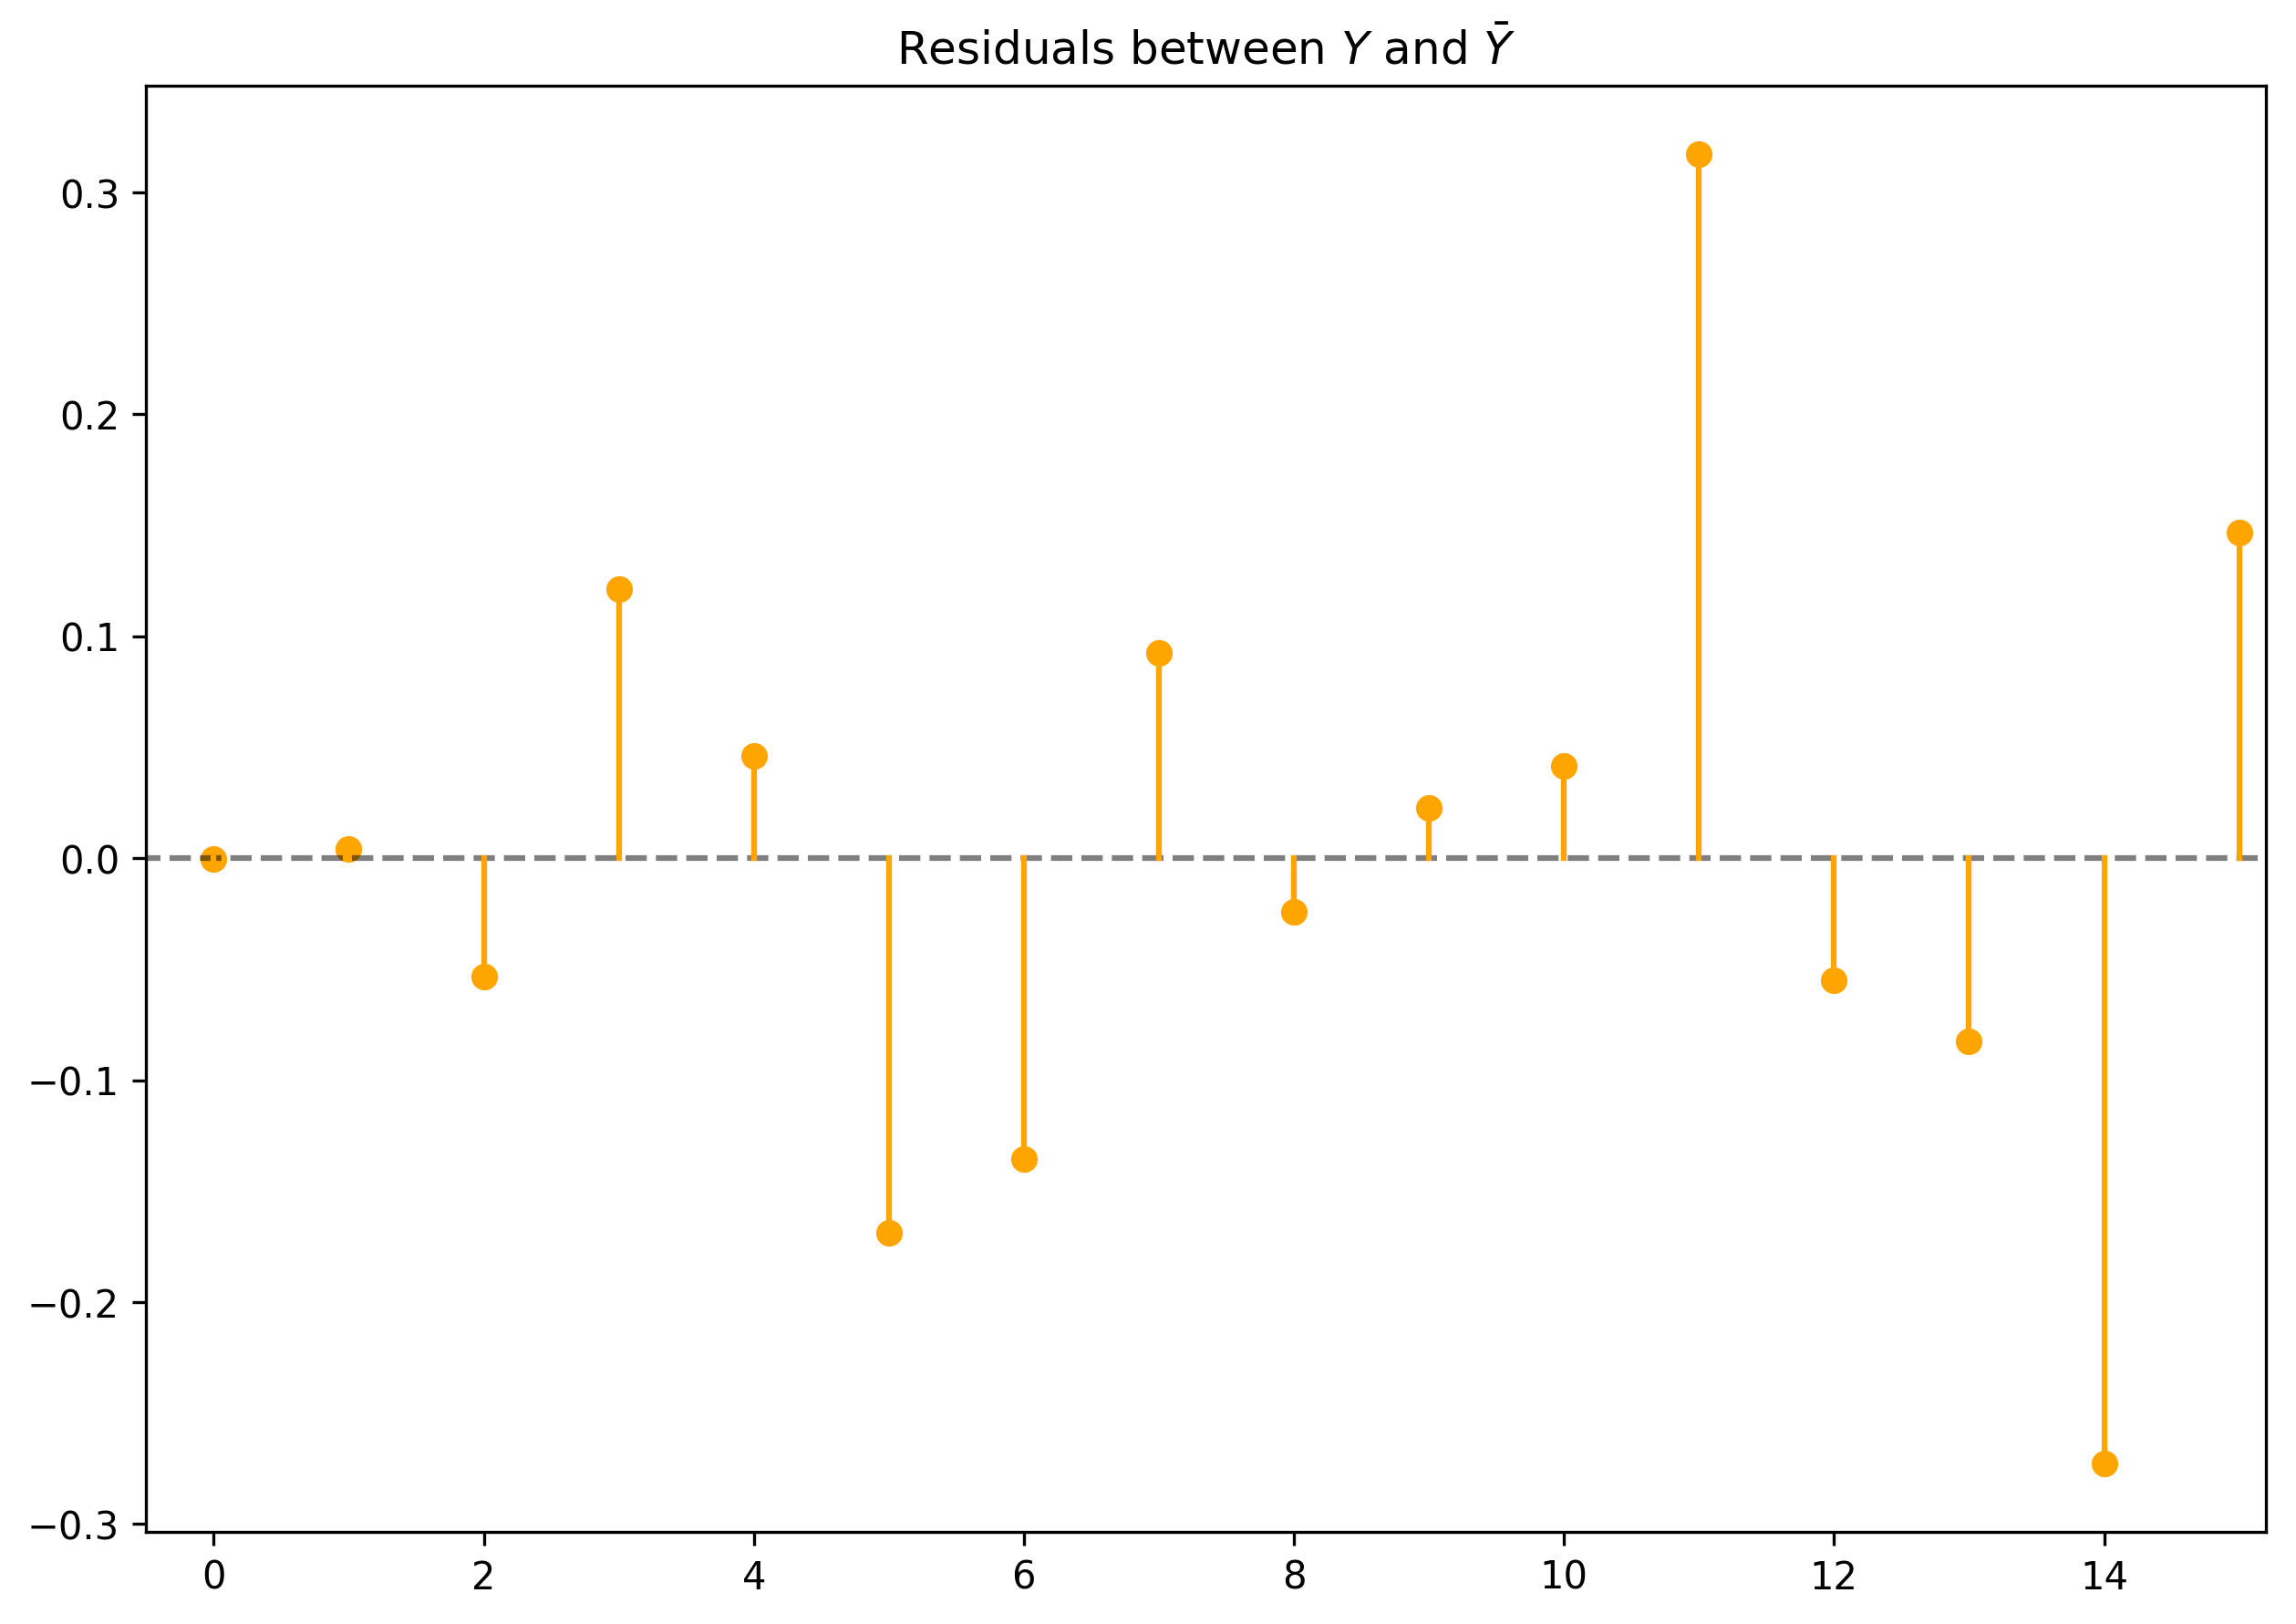

In [164]:
graph_residuals(roses_logmod)

#### c) Interpreting the Parameters

In [58]:
roses_logmod.params

Intercept     3.572156
np.log(X2)   -1.170728
np.log(X3)    0.737938
np.log(X4)    1.153213
X5           -0.030111
dtype: float64

The values for $\beta_2$ and $\beta_3$ do concur with the *a priori* expectations. This is due the fact that, for a small positive change in the price of the roses and the income of families, we would expect that the quantity of roses sold decreases in the former case and increases in the latter.

Furthermore, the value of $\beta_4$ does not match the *a priori* expectations. A small average increase in the whilesale price of roses would not imply, under the *a priori* expectation, an increase in the quantity of roses sold.

#### d) Linear model computations
We could compute $\beta_2$ by changing X2 one percent and see how $Y$ reacts. The same for rationale could be applied to $\beta_3$

#### e) Choosing a model

I would choose neither. Given the existence of non-significant variables, and a possible superfluous variable $X_5$. The best alternative is to decide which variables do give useful information

****
## Exercise 7.17

Wildcats are wells drilled to ﬁnd and produce oil and/or gas in an improved area or to ﬁnd a new reservoir in a ﬁeld previously found to be productive of oil or gas or to extend the limit of a known oil or gas reservoir.

- $Y$: The number of wildcats drilled
- $X_2$: Price at the wellhead in the previous period
- $X_3$: domestic output
- $X_4$: GNP constant dollars
- $X_5$: Trend variable

See if the following model fitst the data:

$$
    Y_t = \beta_1 + \beta_2X_{2_t} + \beta_3\ln X_{3t} + \beta_4X_{4t} + \beta_5X_{5t} + \varepsilon_t
$$

* **a.** Can you offer an a priori rationale to this model?

* **b.** Assuming the model is acceptable, estimate the parameters of the model and their standard errors, and obtain $R^2$ and $\bar R^2$.

* **c.** Comment on your results in view of your prior expectations.

* **d.** What other speciﬁcation would you suggest to explain wildcat activity?  Why?

In [141]:
wildcat = pd.read_csv("wildcat.csv")
wildcat.head()

,Y,X2,X3,X4,X5
0,8.01,4.89,5.52,487.67,0
1,9.06,4.83,5.05,490.59,1
2,10.31,4.68,5.41,533.55,2
3,11.76,4.42,6.16,576.57,3
4,12.43,4.36,6.26,598.62,4


#### a) Rationale

The rationale of this model is to explain the number of wildcats drilled based on the price of previous wellheads, the percentual change of the domestic output, the GNP and some trend variable to allocate time.

#### b) Obtaining $R^2$ and $\bar R^2$

In [191]:
wcat_model  = smf.ols("Y ~ X2 + np.log(X3) + X4 + X5",
                      data=wildcat).fit()

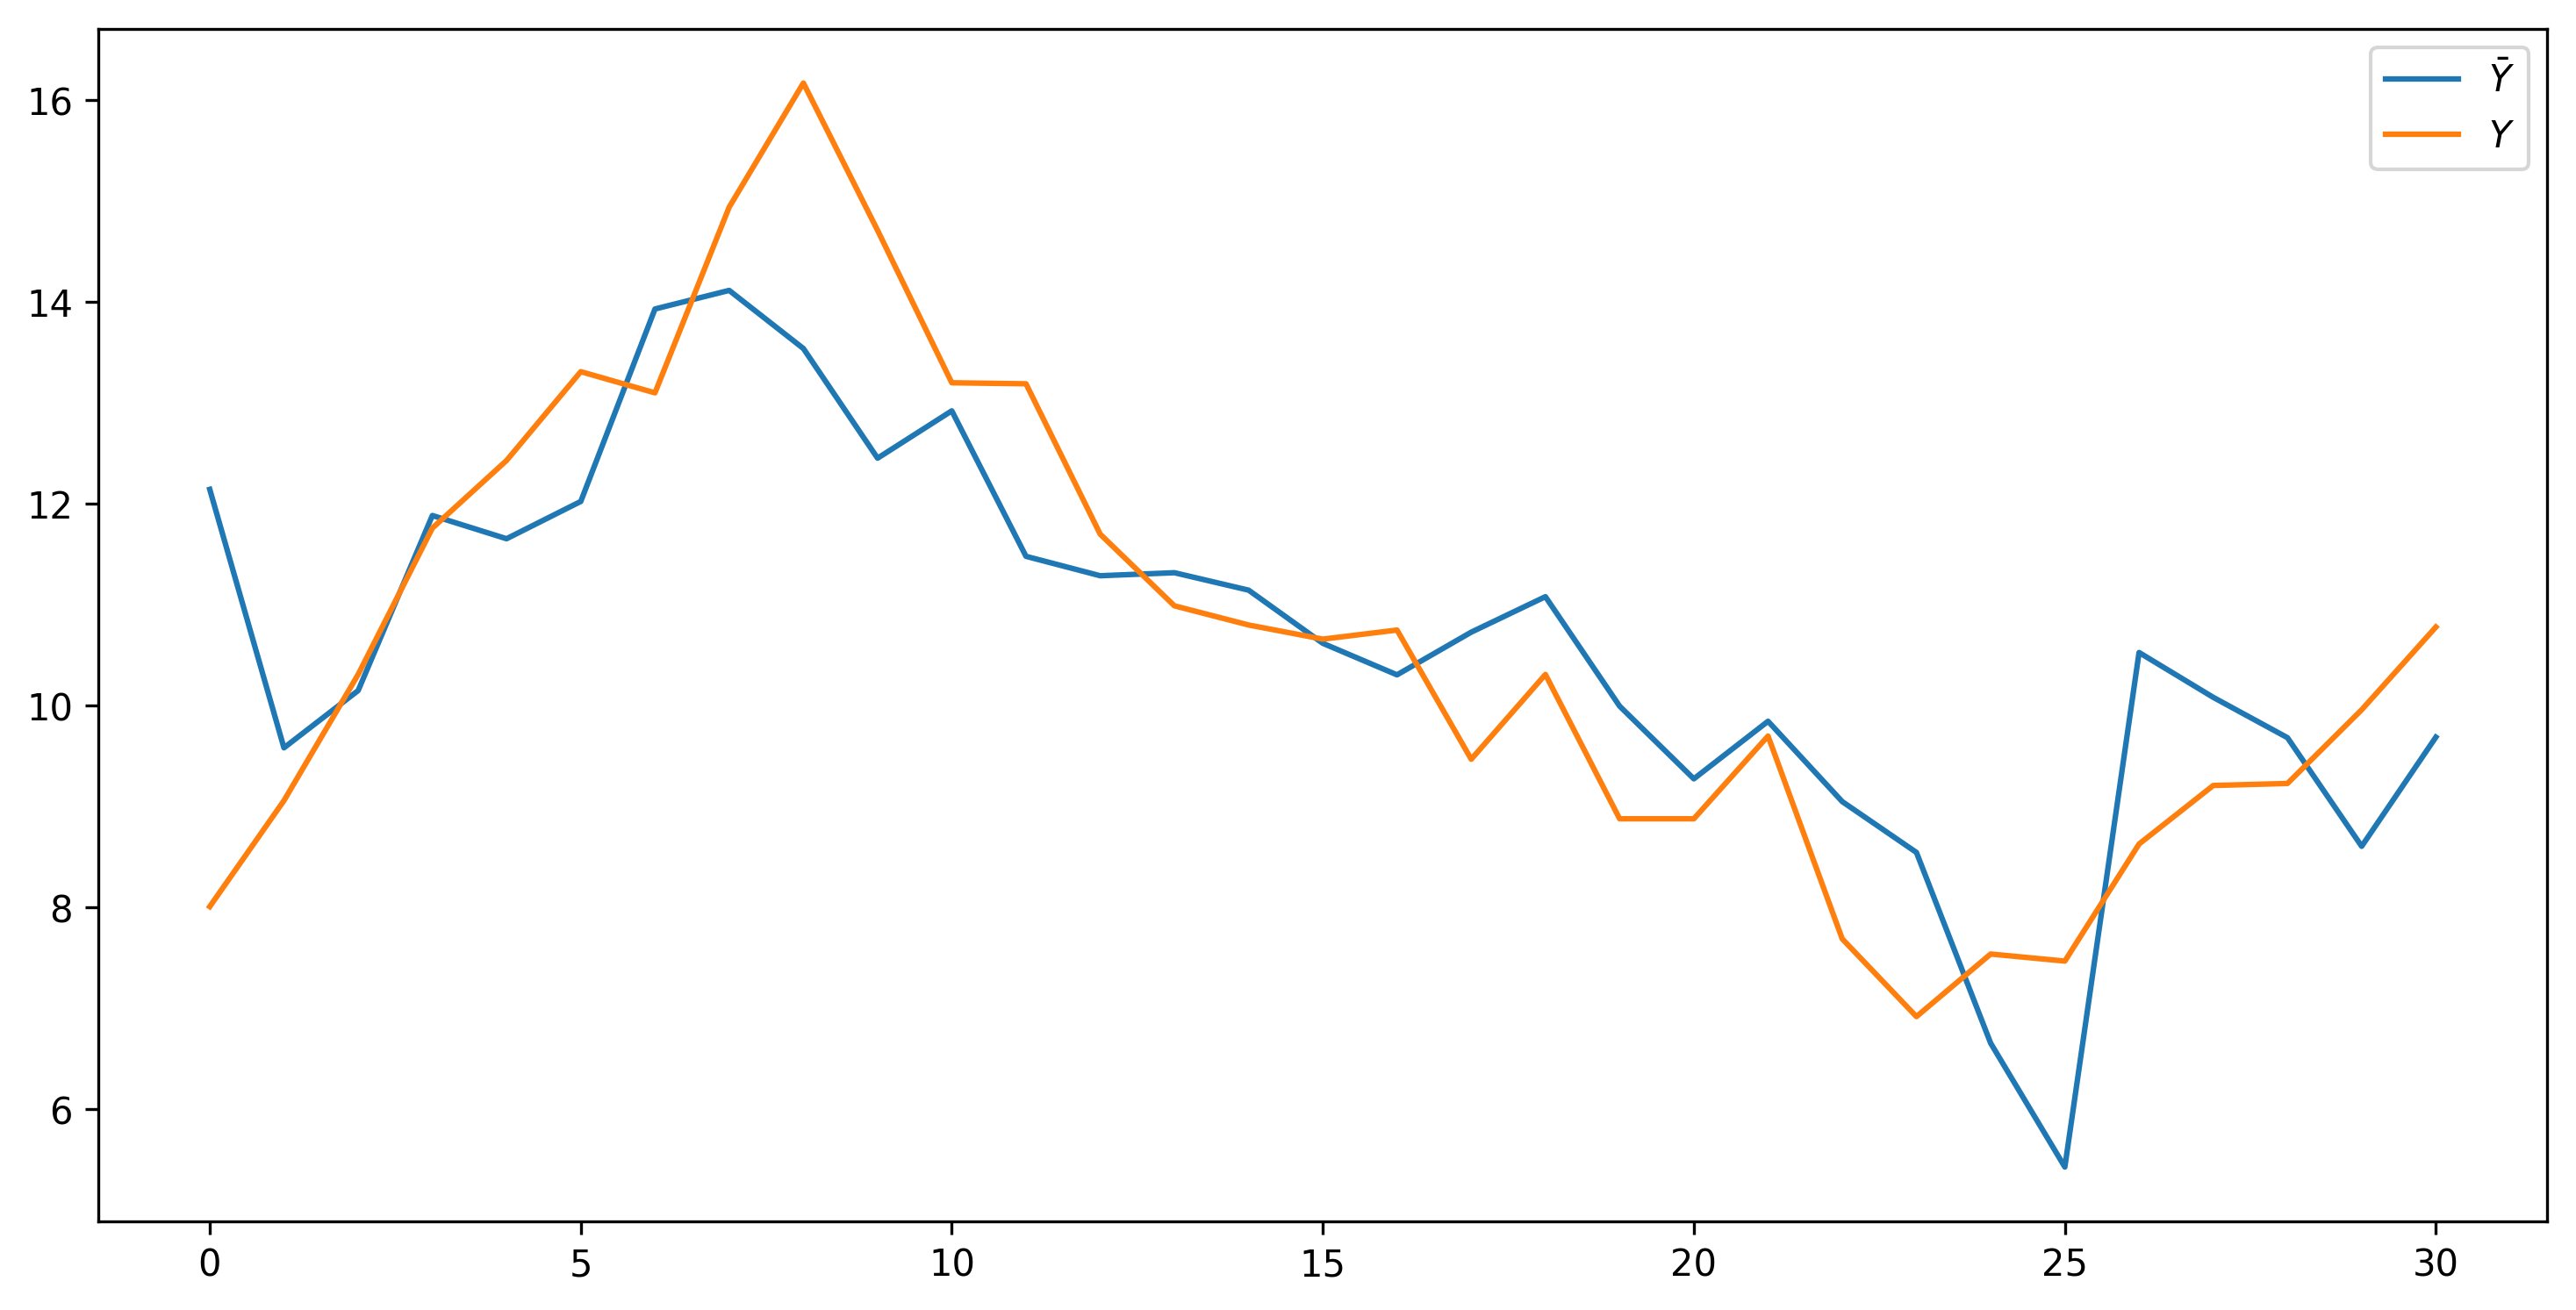

In [192]:
plt.figure(figsize=(12,6), dpi=300)
plt.plot(wcat_model.fittedvalues, label=r"$\bar Y$")
plt.plot(wildcat.Y, label="$Y$")
plt.legend()
plt.show()

In [161]:
print("R^2: {}".format(round(wcat_model.rsquared,4)))
print("Adj. R^2: {}".format(round(wcat_model.rsquared_adj, 4)))

R^2: 0.6559
Adj. R^2: 0.603


#### c) Summary

The model seems to explain over half of the variation in the observed data. Further analysis would help us determine whether there are variables missing or variables currently in the model that we do not need.

#### d) Model Adjustment

I would consider the demand of gas and oil as an extra variable to determine the number of wilcats drilled.